# **Boosting Techniques | Assignment**

# **Question 1: What is Boosting in Machine Learning? Explain how it improves weak learners.**

Boosting is a powerful ensemble learning technique that combines multiple 'weak' or 'base' learners to create a 'strong' learner. The core idea is to sequentially build models, where each new model attempts to correct the errors of the previous ones. It focuses on misclassified instances, giving them more weight in subsequent training steps.

Here's how it improves weak learners:

**Sequential Learning:** Unlike bagging (e.g., Random Forest) where models are built independently, boosting builds models sequentially. Each new model learns from the mistakes of the previous models.

**Focus on Difficult Cases:** Boosting algorithms assign higher weights to data points that were misclassified by earlier weak learners. This forces subsequent learners to pay more attention to these 'hard' examples, leading to a better overall model.

**Error Correction:** Each weak learner tries to correct the errors of its predecessors. By iteratively reducing the errors, the combined strong learner becomes highly accurate.

**Reduced Bias:** Boosting algorithms are very effective at reducing bias. By repeatedly focusing on errors and improving the model, they can fit complex relationships in the data very well.

**Weighted Voting/Prediction:** In the final prediction phase, the predictions of the individual weak learners are combined, often with weights assigned based on their accuracy, to produce the final output.

Common boosting algorithms include AdaBoost, Gradient Boosting (GBM), XGBoost, LightGBM, and CatBoost.

# **Question 2: What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?**

Both AdaBoost and Gradient Boosting are ensemble learning techniques that combine multiple weak learners (typically decision trees) to create a strong learner. However, they differ significantly in how they train these weak learners and how they correct errors.

### **AdaBoost (Adaptive Boosting)**

**Focus:** AdaBoost primarily focuses on **misclassified samples** from the previous weak learner.

**Training Process:**

1.  **Initialize Weights:** Each training sample is initially assigned an equal weight.
2.  **Sequential Training:** A weak learner (e.g., a shallow decision tree) is trained on the training data.
3.  **Update Sample Weights:** After training, the weights of the misclassified samples are increased, and the weights of the correctly classified samples are decreased. This makes subsequent weak learners focus more on the samples that were difficult for the previous learner.
4.  **Update Learner Weights:** The weak learner itself is assigned a weight based on its accuracy. More accurate learners get higher weights.
5.  **Iteration:** Steps 2-4 are repeated for a predefined number of iterations or until a certain performance threshold is met.
6.  **Final Prediction:** The predictions of all weak learners are combined using a weighted majority vote (for classification) or a weighted sum (for regression), where the weights are those assigned to the individual learners.

**Key Characteristic:** AdaBoost adapts to the 'hardness' of samples by adjusting their weights.

### **Gradient Boosting**

**Focus:** Gradient Boosting primarily focuses on **the errors (residuals) made by the previous ensemble**.

**Training Process:**

1.  **Initial Prediction:** An initial model (often a simple constant value like the mean for regression or log-odds for classification) is used to make predictions.
2.  **Calculate Residuals (Errors):** For each training sample, the 'residual' is calculated, which is the difference between the actual target value and the current ensemble's prediction.
3.  **Train Weak Learner on Residuals:** A new weak learner is trained specifically to predict these residuals (or the negative gradient of the loss function). In essence, it tries to learn the errors of the previous ensemble.
4.  **Add to Ensemble:** The prediction of this new weak learner is added to the previous ensemble's prediction, usually scaled by a learning rate (shrinkage parameter). This new learner essentially 'corrects' the errors of the prior models.
5.  **Iteration:** Steps 2-4 are repeated for a predefined number of iterations.
6.  **Final Prediction:** The final prediction is the sum of the initial prediction and the predictions of all subsequent weak learners.

**Key Characteristic:** Gradient Boosting iteratively builds the model by fitting new models to the residuals of the previous steps, effectively minimizing the loss function using gradient descent principles.

### **Summary of Differences:**

| Feature                 | AdaBoost                                     | Gradient Boosting                                   |
| :---------------------- | :------------------------------------------- | :-------------------------------------------------- |
| **Error Correction**    | Adjusts **sample weights** to focus on misclassified samples. | Fits new models to **residuals (errors)** of the previous ensemble. |
| **Model Combination**   | Uses weighted majority vote/sum of weak learners. | Sums up the predictions of all weak learners (with learning rate). |
| **Focus**               | Adapts to difficult *data points*.           | Adapts to difficult *prediction errors*.            |
| **Loss Function**       | Not directly optimizing a differentiable loss function for the weak learners (though the overall algorithm optimizes an exponential loss for classification). | Directly optimizes a differentiable loss function by using its negative gradient. |
| **Sensitivity to Outliers** | More sensitive to noisy data and outliers due to sample weighting. | Less sensitive to outliers compared to AdaBoost, but still can be affected if residuals are large. |

# **Question 3: How does regularization help in XGBoost?**

Regularization is a key aspect of XGBoost that distinguishes it from many other boosting algorithms. It helps to prevent overfitting, making the model more robust and improving its generalization performance on unseen data.

XGBoost incorporates several regularization techniques:

### **1. L1 and L2 Regularization (Lasso and Ridge Penalties) on Weights**

XGBoost adds L1 (Lasso) and L2 (Ridge) regularization terms to the objective function, which is the quantity it tries to minimize during training. These terms penalize the complexity of the model.

*   **L1 Regularization (Lasso, controlled by `alpha` parameter):** This adds a penalty equal to the absolute value of the magnitude of coefficients. It can lead to sparse models, where some feature weights become exactly zero, effectively performing feature selection.
*   **L2 Regularization (Ridge, controlled by `lambda` parameter):** This adds a penalty equal to the square of the magnitude of coefficients. It helps to shrink the feature weights towards zero, reducing their impact and preventing them from becoming too large.

**How it helps:** By penalizing large weights and complex models, L1 and L2 regularization discourages individual trees from relying too heavily on specific features or making very aggressive splits. This prevents the model from fitting noise in the training data.

### **2. Shrinkage (Learning Rate, controlled by `eta` parameter)**

Shrinkage is a technique where the contribution of each tree to the overall model is scaled down by a factor (the learning rate). After each tree is built, its predictions are multiplied by `eta` before being added to the ensemble.

**How it helps:** A small learning rate means that each new tree has less impact, requiring more trees to be built. This slower learning process makes the model more robust to the specific patterns in the training data, effectively preventing overfitting. It also helps to prevent individual trees from dominating the ensemble.

### **3. Subsampling (Column and Row Subsampling)**

XGBoost supports subsampling of both rows (training instances) and columns (features) before building each tree.

*   **Row Subsampling (controlled by `subsample` parameter):** Similar to Random Forest, this involves training each tree on a random subset of the training data. This means that not all data points are seen by every tree.
*   **Column Subsampling (controlled by `colsample_bytree`, `colsample_bylevel`, `colsample_bynode` parameters):** This involves randomly selecting a subset of features to consider when looking for the best split at each node (or level, or tree). This is similar to the `max_features` parameter in Random Forests.

**How it helps:** Subsampling introduces randomness into the tree-building process. By training trees on different subsets of data and features, it reduces the correlation between individual trees, making the ensemble more diverse and less prone to overfitting to specific patterns in the full dataset or specific features.

### **4. Max Depth of Trees (controlled by `max_depth` parameter)**

Limiting the maximum depth of individual trees is a form of pre-pruning that directly controls the complexity of each weak learner.

**How it helps:** Shallower trees are simpler and less likely to capture noise or highly specific patterns in the training data. By restricting the depth, XGBoost prevents individual trees from becoming too specialized and overfitting.

### **5. Minimum Child Weight (controlled by `min_child_weight` parameter)**

This parameter specifies the minimum sum of instance weight (Hessian) needed in a child. If the tree partition step results in a leaf node with the sum of instance weight less than `min_child_weight`, then the building process will give up further partitioning.

**How it helps:** `min_child_weight` helps to prevent the creation of leaf nodes that are too small and thus prone to capturing noise. It ensures that splits only occur if there is sufficient data support, making the trees more generalized.

### **In Summary:**

By combining these regularization techniques, XGBoost achieves a powerful balance between model complexity and predictive accuracy. It allows the model to learn complex relationships in the data while actively preventing it from memorizing the training examples, leading to better performance on new, unseen data.

# **Question 4: Why is CatBoost considered efficient for handling categorical data?**

CatBoost (Categorical Boosting) is a powerful gradient boosting library that stands out for its robust and efficient handling of categorical features. Unlike many other boosting algorithms that require extensive preprocessing of categorical data (e.g., one-hot encoding, target encoding with potential data leakage), CatBoost automates and optimizes this process internally.

Here's why CatBoost is considered efficient for handling categorical data:

### **1. Ordered Target Encoding (aka. Ordered Boosting Principle)**

This is perhaps the most significant innovation in CatBoost for categorical features. Traditional target encoding (or mean encoding) can suffer from target leakage, where the model uses information from the target variable to encode categorical features, leading to overfitting. CatBoost addresses this with an "ordered" approach:

*   **Prevents Target Leakage:** For each sample, the target-based statistics (e.g., average target value) for a categorical feature are calculated *only using the training samples observed *before* the current sample in a random permutation of the dataset*. This prevents information from the current sample's target value from leaking into its feature encoding.
*   **Dynamic Encoding:** The encoding is done on-the-fly during training. This means that for a given categorical feature, its numerical representation can vary depending on the position of the sample in the random permutation.
*   **Equation:** For a categorical feature `C`, and a given sample `(X_i, y_i)`, the ordered target encoding might be calculated as:
    `E(C=val) = (Sum(y_j for j < i and C_j = val) + prior * count) / (count(j < i and C_j = val) + prior)`
    Where `prior` is a smoothing term and `count` is the number of times `val` appeared before sample `i`.

**Efficiency:** This method avoids the need for manual, potentially leakage-prone preprocessing steps and handles high-cardinality categorical features gracefully.

### **2. One-Hot Encoding for Low-Cardinality Features**

For categorical features with a small number of unique values (low cardinality), CatBoost can automatically apply one-hot encoding. This is controlled by the `one_hot_max_size` parameter. If the number of unique categories is less than or equal to this parameter, CatBoost will use one-hot encoding.

**Efficiency:** This is a sensible default as one-hot encoding works well for low-cardinality features without creating too many new columns.

### **3. Combination of Categorical Features**

CatBoost doesn't just treat categorical features individually; it can automatically combine multiple categorical features into new, more expressive features. For example, if you have `Color` and `Shape` as categorical features, CatBoost might create a new combined feature like `Color_Shape` (e.g., `Red_Circle`).

**Efficiency:** This helps the model capture interactions between features that might otherwise be missed, leading to a more powerful model without the need for manual feature engineering of interaction terms.

### **4. Ordered Boosting (Permutation-driven Training)**

While not exclusively for categorical features, CatBoost's "ordered boosting" scheme is closely tied to its categorical feature handling. It uses a different tree-building mechanism where gradient calculations for each tree are based on a subset of the data that doesn't include the current sample being considered for a split. This technique further reduces prediction shift and improves model quality, especially with target-encoded categorical features.

### **5. Handling of Missing Categories**

CatBoost has built-in mechanisms to handle new or unseen categories in the test set, typically by assigning them a default value or treating them as part of a grouped 'other' category. This makes the model more robust in real-world scenarios.

### **In Summary:**

CatBoost's efficiency in handling categorical data stems from its intelligent, built-in strategies like ordered target encoding, automatic feature combination, and robust handling of one-hot encoding for low-cardinality features. These techniques reduce the need for extensive manual preprocessing, mitigate target leakage, and lead to more accurate and generalizable models, especially in datasets rich with categorical information.

# **Question 5: What are some real-world applications where boosting techniques are preferred over bagging methods?**

Boosting techniques, due to their sequential nature and focus on reducing bias by correcting errors of previous models, are often preferred over bagging methods (like Random Forest) in scenarios where high accuracy and the ability to capture complex relationships are paramount. While bagging methods reduce variance, boosting primarily aims to reduce bias.

Here are some real-world applications where boosting techniques are commonly preferred:

### **1. Search Ranking / Information Retrieval**

*   **Application:** Ranking web pages, documents, or search results based on relevance to a query.
*   **Why Boosting:** Boosting algorithms (especially Gradient Boosting variants like XGBoost and LightGBM) are highly effective in learning complex ranking functions. They can model the intricate relationships between various features (e.g., query-document relevance, click-through rates, document authority) to produce highly accurate and relevant rankings. Their ability to minimize a custom loss function makes them ideal for optimizing ranking metrics like NDCG (Normalized Discounted Cumulative Gain).

### **2. Fraud Detection**

*   **Application:** Identifying fraudulent transactions (credit card, insurance, etc.) or activities.
*   **Why Boosting:** Fraud detection often involves highly imbalanced datasets and subtle patterns. Boosting algorithms can iteratively learn from misclassified fraudulent cases (which are typically rare) and assign them higher weights, leading to models with higher recall and precision in identifying fraud. XGBoost, in particular, is widely used for its robust performance and regularization features that prevent overfitting to the majority class.

### **3. Customer Churn Prediction**

*   **Application:** Predicting which customers are likely to cancel a subscription or switch providers.
*   **Why Boosting:** Churn prediction requires understanding complex customer behavior patterns across various features (usage history, demographics, interaction data). Boosting models can effectively capture these non-linear relationships and interactions between features, providing accurate predictions that allow businesses to intervene proactively.

### **4. Ad Click-Through Rate (CTR) Prediction**

*   **Application:** Predicting the probability that a user will click on a given advertisement.
*   **Why Boosting:** CTR prediction is crucial for ad targeting and revenue generation. It involves vast datasets with many categorical features and complex interactions. CatBoost, with its efficient handling of categorical features and ordered boosting, and LightGBM, with its speed and memory efficiency, are frequently used to build highly accurate CTR prediction models.

### **5. Credit Scoring and Risk Assessment**

*   **Application:** Evaluating the creditworthiness of loan applicants or assessing risk in financial markets.
*   **Why Boosting:** Accurate risk assessment is critical in finance. Boosting models can learn from historical data to identify key indicators of default or risk, offering precise probability estimates. Their robustness and ability to handle various data types make them suitable for these sensitive applications.

### **6. Medical Diagnosis and Prognosis**

*   **Application:** Predicting disease outcomes, diagnosing conditions, or identifying risk factors.
*   **Why Boosting:** In medical contexts, high accuracy and the ability to combine information from diverse features (patient demographics, lab results, medical history) are vital. Boosting algorithms can create powerful predictive models, assisting clinicians in making informed decisions. However, interpretability is also key in this domain, and techniques to interpret tree-based models are often employed.

### **7. Recommendation Systems**

*   **Application:** Recommending products, movies, or content to users.
*   **Why Boosting:** While collaborative filtering and matrix factorization are common, boosting can be used in combination with other techniques or directly for tasks like predicting user ratings or whether a user will interact with a recommended item. They can leverage rich feature sets about users and items to refine recommendations.

In general, boosting is preferred when:

*   **High Accuracy is Critical:** Boosting typically achieves higher accuracy than bagging methods, especially when the weak learners are already quite good.
*   **Complex Relationships Exist:** Boosting can uncover complex non-linear relationships and interactions within the data.
*   **Bias Reduction is the Main Goal:** Boosting excels at reducing the bias component of prediction error.

However, it's also worth noting that boosting can be more prone to overfitting if not properly regularized, and bagging methods (like Random Forest) are generally more robust to noise and outliers and are inherently more parallelizable.

# **Question 6: Write a Python program to: ● Train an AdaBoost Classifier on the Breast Cancer dataset ● Print the model accuracy**

Use sklearn.datasets.load_breast_cancer() for classification tasks.

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Load the Breast Cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Display the first few rows of the features and target
print("Features (X) head:")
display(X.head())
print("Target (y) head:")
display(y.head())

# 2. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Check the shapes of the split data
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# 3. Train an AdaBoost Classifier

# AdaBoost typically uses weak learners, often shallow decision trees.
# Here, we'll use a DecisionTreeClassifier with max_depth=1 (a decision stump) as the base estimator.
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)

adaboost_model = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=100,  # Number of weak learners to train
    learning_rate=1.0, # Contribution of each classifier to the ensemble
    random_state=42
)

adaboost_model.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = adaboost_model.predict(X_test)

# 5. Print the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAdaBoost Classifier Accuracy on Breast Cancer Dataset: {accuracy:.4f}")


Features (X) head:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Target (y) head:


,0
0,0
1,0
2,0
3,0
4,0


X_train shape: (398, 30)
X_test shape: (171, 30)
y_train shape: (398,)
y_test shape: (171,)

AdaBoost Classifier Accuracy on Breast Cancer Dataset: 0.9532


# **Question 7: Write a Python program to: ● Train a Gradient Boosting Regressor on the California Housing dataset ● Evaluate performance using R-squared score**

Use sklearn.datasets.fetch_california_housing() for regression
tasks.




In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 1. Load the California Housing dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target)

# Display the first few rows of the features and target
print("Features (X) head:")
display(X.head())
print("Target (y) head:")
display(y.head())

# 2. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shapes of the split data
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# 3. Train a Gradient Boosting Regressor

gbr_model = GradientBoostingRegressor(
    n_estimators=100,  # Number of boosting stages
    learning_rate=0.1, # Step size shrinkage to prevent overfitting
    max_depth=3,       # Maximum depth of the individual regression estimators
    random_state=42
)

gbr_model.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = gbr_model.predict(X_test)

# 5. Evaluate performance using R-squared score
r2 = r2_score(y_test, y_pred)
print(f"\nGradient Boosting Regressor R-squared Score on California Housing Dataset: {r2:.4f}")


Features (X) head:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Target (y) head:


,0
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


X_train shape: (14448, 8)
X_test shape: (6192, 8)
y_train shape: (14448,)
y_test shape: (6192,)

Gradient Boosting Regressor R-squared Score on California Housing Dataset: 0.7803


# **Question 8: Write a Python program to: ● Train an XGBoost Classifier on the Breast Cancer dataset ● Tune the learning rate using GridSearchCV ● Print the best parameters and accuracy**

Use sklearn.datasets.load_breast_cancer() for classification tasks.

In [3]:
import pandas as pd
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# 1. Load the Breast Cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Display the first few rows of the features and target
print("Features (X) head:")
display(X.head())
print("Target (y) head:")
display(y.head())

# 2. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Check the shapes of the split data
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# 3. Initialize XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic', # For binary classification
    eval_metric='logloss',       # Evaluation metric for optimization
    use_label_encoder=False,     # Suppress warning about label encoder
    random_state=42
)

# 4. Define the parameter grid for GridSearchCV (tuning learning rate)
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# 5. Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy', # Use accuracy as the scoring metric
    cv=5,               # 5-fold cross-validation
    verbose=1,          # Output progress
    n_jobs=-1           # Use all available CPU cores
)

# 6. Train with GridSearchCV to find the best learning rate
print("\nStarting GridSearchCV for learning_rate tuning...")
grid_search.fit(X_train, y_train)

# 7. Print the best parameters and best score
print("\nBest parameters found by GridSearchCV:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# 8. Evaluate the best model on the test set
best_xgb_model = grid_search.best_estimator_
y_pred = best_xgb_model.predict(X_test)

# 9. Print the model accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"\nXGBoost Classifier Accuracy on Test Set with best parameters: {accuracy:.4f}")


Features (X) head:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Target (y) head:


,0
0,0
1,0
2,0
3,0
4,0


X_train shape: (398, 30)
X_test shape: (171, 30)
y_train shape: (398,)
y_test shape: (171,)

Starting GridSearchCV for learning_rate tuning...
Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:28:32] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Best parameters found by GridSearchCV: {'learning_rate': 0.05}
Best cross-validation accuracy: 0.9650000000000001

XGBoost Classifier Accuracy on Test Set with best parameters: 0.9591


# **Question 9: Write a Python program to: ● Train a CatBoost Classifier ● Plot the confusion matrix using seaborn**

In [4]:
# Install CatBoost if you haven't already
!pip install catboost -qq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.9 MB/s eta 0:00:00


Features (X) head:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Target (y) head:


,0
0,0
1,0
2,0
3,0
4,0


X_train shape: (398, 30)
X_test shape: (171, 30)
y_train shape: (398,)
y_test shape: (171,)

Training CatBoost Classifier...

CatBoost Classifier Accuracy on Breast Cancer Dataset: 0.9532


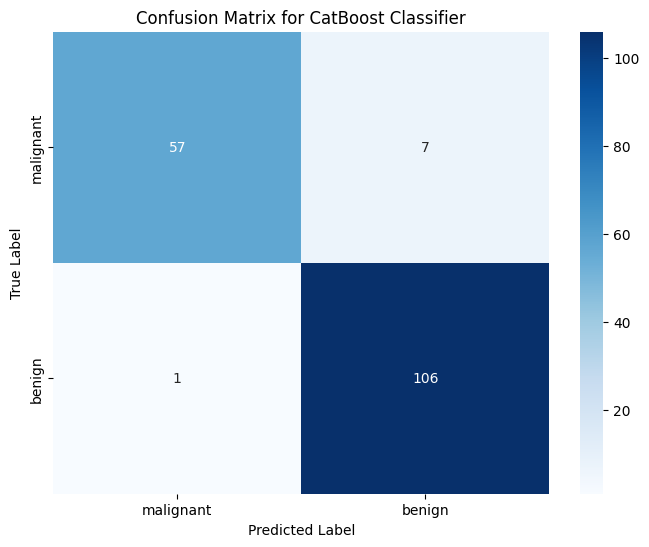

In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier

# 1. Load the Breast Cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Display the first few rows of the features and target
print("Features (X) head:")
display(X.head())
print("Target (y) head:")
display(y.head())

# 2. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Check the shapes of the split data
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# 3. Train a CatBoost Classifier
print("\nTraining CatBoost Classifier...")
cat_model = CatBoostClassifier(
    iterations=100, # Number of boosting iterations
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss', # For binary classification
    eval_metric='Accuracy',
    random_seed=42,
    verbose=0, # Suppress verbose output during training
    # CatBoost handles categorical features automatically if specified.
    # For this dataset, all features are numerical, so no need to specify cat_features.
)

cat_model.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = cat_model.predict(X_test)

# 5. Print the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nCatBoost Classifier Accuracy on Breast Cancer Dataset: {accuracy:.4f}")

# 6. Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Confusion Matrix for CatBoost Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# **Question 10: You're working for a FinTech company trying to predict loan default using customer demographics and transaction behavior. The dataset is imbalanced, contains missing values, and has both numeric and categorical features. Describe your step-by-step data science pipeline using boosting techniques: ● Data preprocessing & handling missing categorical values ● Choice between AdaBoost, XGBoost, or CatBoost ● Hyperparameter tuning strategy ● Evaluation metrics you'd choose and why ● How the business would benefit from your model**

# Task
- **Describe Data Science Pipeline**: Generate a markdown cell describing a step-by-step data science pipeline for predicting loan default. This will cover data preprocessing (handling missing values and categorical features), model choice among boosting techniques (AdaBoost, XGBoost, CatBoost), hyperparameter tuning strategy, chosen evaluation metrics with justifications, and the business benefits of the model. The description will specifically address the challenges of an imbalanced dataset and mixed feature types.
- **Final Task**: Provide a comprehensive summary of the proposed data science pipeline, emphasizing key decisions and their rationale for predicting loan default in a FinTech context.

## Describe Data Science Pipeline

### Subtask:
Generate a markdown cell describing a step-by-step data science pipeline for predicting loan default, covering data preprocessing, model choice, hyperparameter tuning, evaluation metrics, and business benefits, while addressing imbalanced datasets and mixed feature types.


## Describe Data Science Pipeline: Loan Default Prediction for FinTech

This section outlines a step-by-step data science pipeline for predicting loan default, specifically tailored for a FinTech company dealing with customer demographics and transaction behavior data. The dataset is characterized by being imbalanced, containing missing values, and having both numeric and categorical features.

### 1. Data Understanding and Initial Exploration

Before any processing, it's crucial to thoroughly understand the dataset. This involves:

*   **Schema Review:** Understanding the meaning and type of each feature (e.g., customer age, income, credit score, loan amount, transaction frequency, payment history). Identify the target variable (loan default: binary classification).
*   **Descriptive Statistics:** Calculating basic statistics (mean, median, standard deviation) for numerical features and frequency distributions for categorical features.
*   **Missing Value Identification:** Quantifying the extent and patterns of missing data across all features.
*   **Outlier Detection:** Identifying extreme values in numerical features that might impact model training.
*   **Feature Type Verification:** Confirming whether features are truly numerical or categorical, and identifying any mixed-type columns.
*   **Imbalance Check:** Assessing the distribution of the target variable to confirm the degree of class imbalance (e.g., percentage of defaults vs. non-defaults).

Initial exploration helps in identifying immediate challenges and informs subsequent preprocessing steps.

### 2. Data Preprocessing and Handling Missing Values

Handling missing values effectively is critical, as boosting algorithms generally do not handle `NaN` values directly (though some, like XGBoost, have native support for a few strategies):

*   **Numerical Features:**
    *   **Imputation:** Simple strategies include imputing with the `mean`, `median` (more robust to outliers), or `mode`. More sophisticated methods could involve `k-NN imputation` or using predictive models to estimate missing values.
    *   **Indicator Variables:** Creating a binary indicator variable for each feature where missing values were imputed, signifying the presence of a missing value. This allows the model to learn if 'missingness' itself is predictive.
*   **Categorical Features:**
    *   **Imputation:** Impute with the `mode` or, preferably, create a new `

## Describe Data Science Pipeline: Loan Default Prediction for FinTech

This section outlines a step-by-step data science pipeline for predicting loan default, specifically tailored for a FinTech company dealing with customer demographics and transaction behavior data. The dataset is characterized by being imbalanced, containing missing values, and having both numeric and categorical features.

### 1. Data Understanding and Initial Exploration

Before any processing, it's crucial to thoroughly understand the dataset. This involves:

*   **Schema Review:** Understanding the meaning and type of each feature (e.g., customer age, income, credit score, loan amount, transaction frequency, payment history). Identify the target variable (loan default: binary classification).
*   **Descriptive Statistics:** Calculating basic statistics (mean, median, standard deviation) for numerical features and frequency distributions for categorical features.
*   **Missing Value Identification:** Quantifying the extent and patterns of missing data across all features.
*   **Outlier Detection:** Identifying extreme values in numerical features that might impact model training.
*   **Feature Type Verification:** Confirming whether features are truly numerical or categorical, and identifying any mixed-type columns.
*   **Imbalance Check:** Assessing the distribution of the target variable to confirm the degree of class imbalance (e.g., percentage of defaults vs. non-defaults).

Initial exploration helps in identifying immediate challenges and informs subsequent preprocessing steps.

### 2. Data Preprocessing and Handling Missing Values

Handling missing values effectively is critical, as boosting algorithms generally do not handle `NaN` values directly (though some, like XGBoost, have native support for a few strategies):

*   **Numerical Features:**
    *   **Imputation:** Simple strategies include imputing with the `mean`, `median` (more robust to outliers), or `mode`. More sophisticated methods could involve `k-NN imputation` or using predictive models to estimate missing values.
    *   **Indicator Variables:** Creating a binary indicator variable for each feature where missing values were imputed, signifying the presence of a missing value. This allows the model to learn if 'missingness' itself is predictive.
*   **Categorical Features:**
    *   **Imputation:** Impute with the `mode` or, preferably, create a new `'Missing'` category to explicitly signal missingness to the model. This is often better than simply imputing the mode, as 'missing' can sometimes be a predictive category.
    *   **CatBoost's Inherent Handling:** CatBoost can handle missing categorical values automatically. If a categorical feature has missing values, CatBoost can treat them as a special category, removing the need for explicit imputation for these features.

*   **Outlier Treatment (if applicable):** Depending on the analysis during exploration, outliers in numerical features might be capped (winsorization) or transformed (e.g., log transformation) to reduce their disproportionate influence on the model.

### 3. Handling Categorical Features

Appropriate encoding of categorical features is crucial for tree-based models:

*   **One-Hot Encoding:** For categorical features with **low cardinality** (a small number of unique values), One-Hot Encoding is a standard approach. It creates new binary features for each category, preventing the model from assuming any ordinal relationship.
*   **Target Encoding / Ordered Encoding:** For features with **high cardinality** (many unique values), One-Hot Encoding can lead to a very sparse dataset and curse of dimensionality. Target encoding (e.g., replacing a category with the mean of the target variable for that category) is a more compact alternative. However, it's prone to target leakage. CatBoost's **Ordered Target Encoding** (as discussed in a previous question) is a sophisticated variant that prevents target leakage by calculating target statistics only on previously seen data points in a random permutation. This is highly beneficial for FinTech datasets with potentially many high-cardinality categorical features (e.g., transaction types, merchant IDs).
*   **CatBoost's Automatic Handling:** A significant advantage of CatBoost is its ability to directly handle categorical features without explicit preprocessing. By declaring columns as categorical, CatBoost applies its ordered target encoding and can combine categorical features internally, reducing manual effort and preventing leakage issues. This makes it a strong candidate for this problem.

### 4. Addressing Imbalanced Dataset

Loan default datasets are inherently imbalanced (far fewer defaults than non-defaults). Ignoring this leads to models that are biased towards the majority class and perform poorly on the minority class (defaults), which is usually the class of interest. Strategies include:

*   **Resampling Techniques:**
    *   **Oversampling:** Increasing the number of samples in the minority class. Techniques like **SMOTE (Synthetic Minority Over-sampling Technique)** generate synthetic samples based on existing minority class instances.
    *   **Undersampling:** Reducing the number of samples in the majority class. This can lead to loss of information but can be effective for very large datasets.
    *   **Combined Approaches:** Using a combination of oversampling the minority and undersampling the majority class (e.g., SMOTE + ENN).
*   **Algorithmic Approaches:**
    *   **Class Weights:** Many boosting algorithms (XGBoost, CatBoost, AdaBoost) allow assigning higher weights to the minority class samples during training. This forces the model to pay more attention to misclassifying defaults.
    *   **Cost-Sensitive Learning:** Adjusting the cost of misclassification errors, making misclassifying a default more expensive than misclassifying a non-default.
*   **Ensemble Methods Designed for Imbalance:** Some specialized ensemble methods exist, but for boosting, adjusting class weights or resampling are common and effective.

### 5. Model Choice (Boosting Techniques)

Given the requirements for high accuracy and handling complex relationships, boosting techniques are excellent choices. Here's a comparison and justification for a FinTech loan default prediction model:

*   **AdaBoost:**
    *   **Pros:** Conceptually simple, effective as a baseline, focuses on hard-to-classify samples.
    *   **Cons:** Highly sensitive to noisy data and outliers, may not perform as well as gradient boosting variants on complex, high-dimensional data, can be slower than GBMs on large datasets.
    *   **Suitability for FinTech:** Could serve as a solid baseline, but likely to be outperformed by more advanced methods given the potential for noise and complex interactions in financial data.

*   **XGBoost:**
    *   **Pros:** Highly optimized for performance (speed and memory), excellent regularization capabilities (L1/L2, shrinkage, subsampling) to prevent overfitting, handles sparse data well, flexible objective functions, widely adopted and well-documented.
    *   **Cons:** Requires careful hyperparameter tuning, still needs explicit handling of categorical features (one-hot, target encoding) before feeding to the model, although it can handle missing values.
    *   **Suitability for FinTech:** A very strong contender. Its speed and regularization are excellent for large financial datasets, and its robustness makes it reliable. The main caveat is the need for careful categorical feature preprocessing.

*   **CatBoost:**
    *   **Pros:** State-of-the-art for handling categorical features automatically and robustly (Ordered Target Encoding prevents leakage), less prone to overfitting due to ordered boosting, good default parameters, often achieves high accuracy with less tuning effort.
    *   **Cons:** Can be slower to train than LightGBM (though often faster than XGBoost with optimal settings), less mature community/documentation than XGBoost.
    *   **Suitability for FinTech:** **Highly Recommended.** Given the problem statement explicitly mentioning 'customer demographics and transaction behavior' (which implies many categorical features) and missing values, CatBoost's native, robust handling of categorical features and missing data is a significant advantage. It reduces the risk of data leakage and simplifies the preprocessing pipeline, potentially leading to a more robust and accurate model with less manual feature engineering.

**Final Model Choice:** CatBoost would likely be the preferred choice due to its superior and automatic handling of categorical features and robustness against target leakage, which are critical in this FinTech context. XGBoost would be a close second, especially if speed is paramount and categorical feature preprocessing can be managed effectively.

### 6. Hyperparameter Tuning Strategy

Optimizing model performance requires thorough hyperparameter tuning:

*   **Cross-Validation:** Always use k-fold cross-validation (e.g., 5-fold or 10-fold) to ensure the robustness of the model and prevent overfitting to the validation set during tuning. Stratified K-Fold should be used for imbalanced datasets to maintain the class distribution in each fold.
*   **Search Strategies:**
    *   **GridSearchCV:** Exhaustively searches over a specified parameter grid. Good for exploring a small, defined range of parameters.
    *   **RandomizedSearchCV:** Samples a fixed number of parameter settings from specified distributions. More efficient than GridSearchCV for larger search spaces.
    *   **Bayesian Optimization (e.g., using Hyperopt, Optuna):** More advanced and efficient, it builds a probabilistic model of the objective function (e.g., accuracy/F1-score) and selects hyperparameters that are most promising to explore. This is ideal for complex models like boosting with many hyperparameters.
*   **Key Hyperparameters for CatBoost (or XGBoost):**
    *   `iterations`/`n_estimators`: Number of boosting rounds (trees).
    *   `learning_rate`/`eta`: Step size shrinkage, controls the contribution of each tree.
    *   `depth`/`max_depth`: Maximum depth of the trees.
    *   `l2_leaf_reg`/`lambda`: L2 regularization term on weights (XGBoost) or leaf values (CatBoost).
    *   `subsample`: Fraction of samples used for fitting the individual base learners.
    *   `colsample_bylevel`/`colsample_bytree`: Fraction of features considered for splits.
    *   `min_child_samples`/`min_child_weight`: Minimum number of samples (CatBoost) or sum of instance weight (XGBoost) required in a child node.
    *   `scale_pos_weight`/`is_unbalanced`: For handling class imbalance by giving more weight to the minority class.

### 7. Evaluation Metrics

For an imbalanced binary classification task like loan default prediction, accuracy alone is insufficient and misleading. Instead, focus on metrics that provide insight into the model's performance on both classes, especially the minority class (defaults):

*   **Confusion Matrix:** Provides a full breakdown of True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN).
*   **Precision (Positive Predictive Value):** `TP / (TP + FP)`. What proportion of predicted defaults were actually defaults? High precision minimizes incorrectly flagging good customers as risky.
*   **Recall (Sensitivity, True Positive Rate):** `TP / (TP + FN)`. What proportion of actual defaults did the model correctly identify? High recall minimizes missed defaults, which directly translates to reduced financial losses.
*   **F1-Score:** The harmonic mean of Precision and Recall. `2 * (Precision * Recall) / (Precision + Recall)`. Provides a balanced measure when both precision and recall are important.
*   **AUC-ROC (Area Under the Receiver Operating Characteristic Curve):** Measures the model's ability to distinguish between positive and negative classes across all possible classification thresholds. A high AUC-ROC indicates good overall discrimination.
*   **PR-Curve (Precision-Recall Curve):** Particularly useful for highly imbalanced datasets. It plots Precision against Recall for various thresholds. The **Area Under the PR Curve (AUPRC)** is often a more informative metric than AUC-ROC for imbalanced data, as it focuses on the performance of the positive class.

**Why Accuracy is Insufficient:** If only 5% of loans default, a model predicting 'no default' for everyone would achieve 95% accuracy, which is deceptively high but useless for the business. Precision, Recall, and F1-Score for the 'default' class, and AUPRC, are far more critical.

### 8. Business Benefits of the Model

A robust loan default prediction model offers significant tangible benefits for a FinTech company:

*   **Reduced Financial Losses:** By accurately identifying high-risk applicants, the company can avoid granting loans that are likely to default, directly saving millions in potential write-offs.
*   **Optimized Risk Assessment:** Provides a quantitative and data-driven basis for assessing applicant risk, leading to more consistent and objective lending decisions.
*   **Improved Loan Approval Processes:** Streamlines and automates parts of the loan application review, allowing for faster decisions for low-risk applicants and focused human review for borderline cases.
*   **Better Customer Segmentation and Personalization:** The insights gained from the model can help segment customers based on their risk profile, allowing for tailored loan products, interest rates, and marketing strategies.
*   **Enhanced Regulatory Compliance:** Provides a structured, auditable approach to risk management, aiding in compliance with financial regulations.
*   **Dynamic Portfolio Management:** Allows for proactive monitoring of existing loans and identifying early warning signs of potential default, enabling timely interventions.
*   **Competitive Advantage:** Superior risk models can enable the company to offer more competitive rates to low-risk customers while prudently managing higher-risk segments, thus attracting a broader customer base.

By carefully implementing this pipeline, the FinTech company can transform its loan approval and risk management processes, leading to significant financial gains and a more sustainable business model.

## Final Task

### Subtask:
Provide a comprehensive summary of the proposed data science pipeline, emphasizing key decisions and their rationale for predicting loan default in a FinTech context.


## Summary:

### Data Analysis Key Findings

*   **Comprehensive Pipeline Design:** A detailed eight-step data science pipeline was formulated for predicting loan default in a FinTech context, addressing crucial aspects from data understanding to business benefits.
*   **Robust Data Preprocessing:** The pipeline includes specific strategies for handling missing values (imputation with mean/median/mode, indicator variables, CatBoost's inherent handling) and outliers (capping, transformations).
*   **Strategic Categorical Feature Handling:** For mixed feature types, the pipeline recommends One-Hot Encoding for low cardinality features and sophisticated Target Encoding (specifically CatBoost's Ordered Target Encoding to prevent leakage) for high cardinality features, leveraging CatBoost's automatic capabilities.
*   **Effective Imbalance Management:** To counter the inherent class imbalance in loan default data, the pipeline proposes both resampling techniques (SMOTE, undersampling) and algorithmic approaches (class weights, cost-sensitive learning), coupled with stratified k-fold cross-validation.
*   **Optimized Model Selection:** CatBoost was *highly recommended* as the primary model choice among boosting techniques (AdaBoost, XGBoost, CatBoost). This decision was based on its superior and automatic handling of categorical features, its robustness against target leakage via Ordered Target Encoding, and its suitability for complex FinTech datasets. XGBoost was noted as a strong alternative for its performance and regularization capabilities.
*   **Advanced Hyperparameter Tuning:** The pipeline advocates for hyperparameter optimization using advanced methods like Bayesian Optimization, alongside traditional GridSearchCV and RandomizedSearchCV, ensuring robust model performance.
*   **Appropriate Evaluation Metrics:** It emphasizes using metrics beyond simple accuracy, such as Precision, Recall, F1-Score, AUC-ROC, and crucially, Area Under the Precision-Recall Curve (AUPRC), highlighting their importance for imbalanced datasets where the minority class (defaults) is of paramount interest.
*   **Clear Business Value Proposition:** The described model is projected to deliver significant business benefits, including reduced financial losses, optimized risk assessment, improved loan approval processes, better customer segmentation, and enhanced regulatory compliance.

### Insights or Next Steps

*   The comprehensive pipeline provides a strong theoretical foundation for building a robust loan default prediction system; the immediate next step should involve implementing this pipeline using actual FinTech data to validate its practical effectiveness and fine-tune its components.
*   The emphasis on CatBoost and specific encoding strategies for categorical features highlights a proactive approach to mitigating data leakage and handling complex data characteristics, which is a critical success factor in high-stakes financial modeling.
